<a href="https://colab.research.google.com/github/CobbleFindsDiamond/IAIHW1/blob/main/HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import datetime
# Traveling Salesman Problem -- Setup code

import math
import random
import matplotlib.pyplot as plt
import itertools


# List of city names
city_names = ['Albany','Boston','Charleston','Denver','El Paso','Fairfax','Grand Rapids','Houston','Indianapolis','Jersey City','Knoxville','Los Angeles','Marblehead','New York','Olympus','Philadelphia','Quincy','Raleigh','Salem','Troy','Utica','Voorheesville','Worcester','Xerxes','Yonkers','Zanesville']


# The run_tsp function. Use this to generate a TSP instance,
# and run your code to try and find the best solution within
# the total number of steps (number of times a solution is
# allowed to be tested).
def run_tsp(solve, city_count, max_steps = math.inf, seed = None, plot = True):

    if(seed): random.seed(seed)
    if (not max_steps) or not (max_steps > 0): max_steps = math.inf

    # Generate the cities
    city_coords = {}
    for i in range(city_count):
        city = city_names[i % len(city_names)]
        if(i >= len(city_names)): city = "".join(["New "]*math.floor(i / len(city_names))) + city

        city_coords[city] = (round(random.random(),3)*1000, round(random.random(),3)*1000);

    # Step counter variable initially at zero
    step_counter = 0

    # Define local functions

    def distance(p1, p2):
        return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

    def get_path_length(path):
        nonlocal step_counter
        step_counter += 1

        if (step_counter >= max_steps):
            raise ValueError("Error: maximum number of solutions tested")

        if set(path) != set(city_coords.keys()) or len(path) != len(city_coords):
            raise ValueError("Invalid path: must include each city exactly once.")

        total = 0.0
        for i in range(len(path)-1):
            a, b = path[i], path[(i + 1) % len(path)]
            total += distance(city_coords[a], city_coords[b])

        return total

    def plot_path(path):
        x = [city_coords[city][0] for city in path]
        y = [city_coords[city][1] for city in path]
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, 'o-')
        for city in path:
            plt.text(city_coords[city][0], city_coords[city][1], city)
        plt.title(f"Path length: {get_path_length(path):.2f}")
        plt.show()

    # City names provided to solver
    cities = list(city_coords.keys())

    # Run the provided solver
    final_path = solve(cities, get_path_length, plot_path, max_steps)

    # Output final solution
    final_steps = step_counter
    step_counter = 0
    final_length = get_path_length(final_path)

    print(f"""Number of steps: {final_steps} / {max_steps}
Final path length: {final_length}
Final path: {final_path}
""")

    if(plot): plot_path(final_path)

    return final_path, final_length, final_steps
def random_solve(cities, get_path_length, plot_path, max_steps):

    # Start with a random tour
    current = cities[:]
    random.shuffle(current)

    best_path = current
    best_cost = get_path_length(current)

    # Repeatedly attempt random permutations of the current path
    while True:
        current = mutate(current[:])
        try:
            current_cost = get_path_length(current)
        except ValueError:
            break  # Max steps reached

        if current_cost < best_cost:
            best_path = current
            best_cost = current_cost

    return best_path

def brute_force_solve(cities, get_path_length, plot_path, max_steps):
    best_path = None
    best_cost = float('inf')

    # Try all permutations of the city list
    for perm in itertools.permutations(cities):
        try:
            cost = get_path_length(list(perm))
            if cost < best_cost:
                best_path = list(perm)
                best_cost = cost
        except ValueError:
            break  # Stop if max_steps exceeded

    return best_path


def mutate(path, seed = None):
    """Swaps two random cities to generate a neighbor."""
    a, b = random.sample(range(len(path)), 2)
    path[a], path[b] = path[b], path[a]
    return path

def hill_climbing_solve(cities, get_path_length, plot_path, max_steps):
    # Start with a random tour
    best_path = cities[:]
    random.shuffle(best_path)
    best_cost = get_path_length(best_path)
    i = 0
    # Repeatedly attempt random permutations of the current path
    while True:
        i += 1
        neighboringPath = mutate(best_path[:])
        try:
            current_cost = get_path_length(neighboringPath)
        except ValueError:
            break  # Max steps reached
        if current_cost < best_cost:
            i = 0
            best_path = neighboringPath
            best_cost = current_cost
        else:
            if i > 50:
                break
    return best_path
# 1.1.1: (1pt) Your implementation will be tested with 4 cities and 50 steps; it should find the most optimal solution
print("Most optimal solution:")
opt_sol, opt_len, opt_steps = run_tsp(brute_force_solve, city_count=4, max_steps=100, seed=42, plot=False);

print("Hill-climbing solution:")
final_path, final_len, num_steps = run_tsp(hill_climbing_solve, city_count=4, max_steps=50, seed=42, plot=False);

# Assert that optimal solution and student solution are identical
opt_sol = ['Boston', 'Albany', 'Denver', 'Charleston']
assert("".join(opt_sol) == "".join(final_path) or "".join(reversed(opt_sol)) == "".join(final_path))

# 1.1.1: (1pt) Your implementation will be tested on Submitty with 4 cities and 50 steps; it should find the most optimal solution
print("Most optimal solution:")
run_tsp(brute_force_solve, city_count=12, max_steps=100, seed=42, plot=False);
print("Hill-climbing solve:")
run_tsp(hill_climbing_solve, city_count=12, max_steps=50, seed=42, plot=False);
# 1.1.2: (1pt) Your implementation will be tested on Submitty with 6 cities and 50 steps; it should find a solution with path length < 2000 with seed 42.
run_tsp(hill_climbing_solve, city_count=6, max_steps=50, seed=42, plot=False);
# 1.1.3: (1pt) Your implementation will be tested on Submitty with 12 cities and 50 steps; it should find a solution with path length < 2500 with seed 42.
run_tsp(hill_climbing_solve, city_count=12, max_steps=50, seed=42, plot=False);

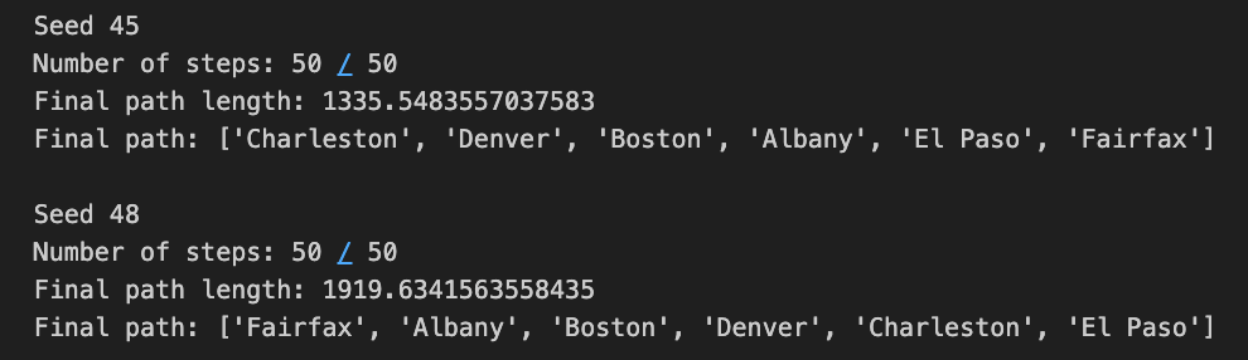
Based on your results, answer the following two questions in a couple of brief sentences each:
1.2.1. (2 pts) What kind of results are you getting for different city counts? How do your results compare to the paths found by the example solvers above -- with what city counts is your solver able to find an optimal or near-optimal solution, and at what point are there too many cities for it to find a good solution?
Most of my benchmarks were at or around the amount expected except for 50 cities, which proved to be too much. Compared to both random solve and the brute force solver, my algorithm was able to outperform both. My solver was able to find the optimal solution for both 12 and 20 cities under the benchmarks. However when faced with 50 cities, it decided that it had enough.
1.2.2 (2 pts) What do you think is causing this algorithm to run into trouble -- and what kinds of modifications could you make to it to improve it?
So before I had a problem with it being more random, so I got rid of the code: [if seed is None: random.seed()     else: random.seed(seed)]. I could also introduce code that stays if you computed  x number of random states and none of them are better then just say thats the best state. I could also add in something to help it overcome when it reaches  a local minimum such as a adding in a probability to take a risk and go for worse solutions sometimes so it can overcome the local minimum.


In [ ]:
import math
import random
import matplotlib.pyplot as plt
import datetime
# Traveling Salesman Problem -- Setup code
import itertools
# List of city names
city_names = ['Albany','Boston','Charleston','Denver','El Paso','Fairfax','Grand Rapids','Houston','Indianapolis','Jersey City','Knoxville','Los Angeles','Marblehead','New York','Olympus','Philadelphia','Quincy','Raleigh','Salem','Troy','Utica','Voorheesville','Worcester','Xerxes','Yonkers','Zanesville']


# The run_tsp function. Use this to generate a TSP instance,
# and run your code to try and find the best solution within
# the total number of steps (number of times a solution is
# allowed to be tested).
def run_tsp(solve, city_count, max_steps = math.inf, seed = None, plot = True):

    if(seed): random.seed(seed)
    if (not max_steps) or not (max_steps > 0): max_steps = math.inf

    # Generate the cities
    city_coords = {}
    for i in range(city_count):
        city = city_names[i % len(city_names)]
        if(i >= len(city_names)): city = "".join(["New "]*math.floor(i / len(city_names))) + city

        city_coords[city] = (round(random.random(),3)*1000, round(random.random(),3)*1000);

    # Step counter variable initially at zero
    step_counter = 0

    # Define local functions

    def distance(p1, p2):
        return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

    def get_path_length(path):
        nonlocal step_counter
        step_counter += 1

        if (step_counter >= max_steps):
            raise ValueError("Error: maximum number of solutions tested")

        if set(path) != set(city_coords.keys()) or len(path) != len(city_coords):
            raise ValueError("Invalid path: must include each city exactly once.")

        total = 0.0
        for i in range(len(path)-1):
            a, b = path[i], path[(i + 1) % len(path)]
            total += distance(city_coords[a], city_coords[b])

        return total

    def plot_path(path):
        x = [city_coords[city][0] for city in path]
        y = [city_coords[city][1] for city in path]
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, 'o-')
        for city in path:
            plt.text(city_coords[city][0], city_coords[city][1], city)
        plt.title(f"Path length: {get_path_length(path):.2f}")
        plt.show()

    # City names provided to solver
    cities = list(city_coords.keys())

    # Run the provided solver
    final_path = solve(cities, get_path_length, plot_path, max_steps)

    # Output final solution
    final_steps = step_counter
    step_counter = 0
    final_length = get_path_length(final_path)

    print(f"""Number of steps: {final_steps} / {max_steps}
Final path length: {final_length}
Final path: {final_path}
""")

    if(plot): plot_path(final_path)

    return final_path, final_length, final_steps

def mutate(path, seed = None):
    """Swaps two random cities to generate a neighbor."""
    a, b = random.sample(range(len(path)), 2)
    path[a], path[b] = path[b], path[a]
    return path

def simulated_annealing_solve(cities, get_path_length, plot_path, max_steps):
    ajustTemp = 0.995
    Temp = 1000
    curr_path = cities[:]
    random.shuffle(curr_path)
    current_cost = get_path_length(curr_path)
    best_path = curr_path[:]
    best_cost = current_cost
    while True:
        neighboringPath = mutate(curr_path[:])
        try:
            neighbor_cost = get_path_length(neighboringPath)
        except ValueError:
            break  # Max steps reached
        delta = neighbor_cost - current_cost
        if delta < 0 or random.random() < math.exp(-delta / Temp):
            curr_path = neighboringPath
            current_cost = neighbor_cost
        if current_cost < best_cost:
            best_path = curr_path[:]
            best_cost = current_cost
        Temp *= ajustTemp
    return best_path
def brute_force_solve(cities, get_path_length, plot_path, max_steps):
    best_path = None
    best_cost = float('inf')

    # Try all permutations of the city list
    for perm in itertools.permutations(cities):
        try:
            cost = get_path_length(list(perm))
            if cost < best_cost:
                best_path = list(perm)
                best_cost = cost
        except ValueError:
            break  # Stop if max_steps exceeded

    return best_path



print("6 cities, simulated annealing:")
final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=6, max_steps=500, seed=42, plot=False);

print("6 cities, most optimal solution:")
opt_sol, opt_len, opt_steps = run_tsp(brute_force_solve, city_count=6, max_steps=1000, seed=42, plot=False);

# Assert that optimal solution and student solution are identical
assert("".join(opt_sol) == "".join(final_path) or "".join(reversed(opt_sol)) == "".join(final_path))
best_path = None
best_len = math.inf

for i in range(0,5):
    print("10 cities, simulated annealing:")
    final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=10, max_steps=50000, seed=42, plot=False);
    if final_len < best_len:
        best_path = final_path
        best_len = final_len

print("6 cities, simulated annealing:")
final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=6, max_steps=500, seed=42, plot=False);

print("6 cities, most optimal solution:")
opt_sol, opt_len, opt_steps = run_tsp(brute_force_solve, city_count=6, max_steps=1000, seed=42, plot=False);

# Assert that optimal solution and student solution are identical
assert("".join(opt_sol) == "".join(final_path) or "".join(reversed(opt_sol)) == "".join(final_path))
# 2.1.2: (1pt) Your implementation will be tested five times with 10 cities and 10000 steps; it should find the most optimal solution at least once

best_path = None
best_len = math.inf

for i in range(0,5):
    print("10 cities, simulated annealing:")
    final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=10, max_steps=50000, seed=42, plot=False);
    if final_len < best_len:
        best_path = final_path
        best_len = final_len


# Commented out as it does take a while to run
print("10 cities, most optimal solution:")
opt_sol, opt_len, opt_steps = run_tsp(brute_force_solve, city_count=10, max_steps=5000000, seed=42, plot=False);
opt_sol = ['Charleston', 'Houston', 'Indianapolis', 'Fairfax', 'Grand Rapids', 'Boston', 'El Paso', 'Albany', 'Jersey City', 'Denver']

# Assert that optimal solution and student solution are identical
assert("".join(opt_sol) == "".join(best_path) or "".join(reversed(opt_sol)) == "".join(best_path))

# 2.1.3: (1pt) Your implementation will be tested with 12 cities and 50000 steps; it should find a solution with path length < 2300 with seed 42.
print("12 cities, simulated annealing:")
final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=12, max_steps=50000, seed=42, plot=False)
assert(final_len < 2300)

# 2.1.4: (1pt) Your implementation will be tested with 20 cities and 50000 steps; it should find a solution with path length < 4000 with seed 42.
print("20 cities, simulated annealing:")
final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=20, max_steps=50000, seed=42, plot=False)
assert(final_len < 4000)

# 2.1.5: (1pt) Your implementation will be tested with 50 cities and 50000 steps; it should find a solution with path length < 10000 with seed 420.
print("50 cities, simulated annealing:")
final_path, final_len, num_steps = run_tsp(simulated_annealing_solve, city_count=50, max_steps=50000, seed=420, plot=False)
assert(final_len < 10000)

![alt text](https://drive.google.com/uc?id=1_uhDSCUzqytCF45tr96bUw5Je3Bv1N7H)
![text](https://drive.google.com/uc?id=1x8xXI9sxeO3fnqo66GVdUruox8VpvNOa)
(warning most of my code runs with 0.995 as the adjustTemp however my ajustTemp has to be 0.096 to make the rest of the assert < blank tests go well as shown above)

Based on your results, answer the following two questions in a couple of brief sentences each:
2.2.1. (3 pts) What kind of results are you getting for different city counts? How do your results compare to the previous results -- with what city counts is your solver able to find an optimal or near-optimal solution, and at what point are there too many cities for it to find a good solution?
So the results are pretty different to the results from the previous algorithm; they use significantly fewer steps. My algorithm was able to pretty much always be optimal to the solution depending on the adjustTemp, I’m sure there are points where its ability to find the best solution falls off. I think it depends on the temperature, when I slightly lowered the temperature, it was able to predict further out, being more accurate to longer city chains. However when I increase the temperature, the algorithm is able to predict more accurately to smaller and smaller city chains, allowing me to break under the 2300 barrier.

2.2.2. (3 pts) Try changing the T_0 and alpha (or T_f) parameters — how do these affect your results?
When I slightly lowered the temperature, it was able to predict further out, being more accurate to longer city chains. However when I increase the temperature, the algorithm is able to predict more accurately to smaller and smaller city chains, allowing me to break under the 2300 barrier. And in addition to this, I think a  possible explanation is that a cooler temperature is more conservative which lets it focus on the more likely distribution of the smaller dataset. But when you increase the temperature, you are able to play around with more greater wider steps that help to explore the relatively known distribution of a larger dataset.
2.2.3 (2 pts) Where might the algorithm still run into trouble -- and what kinds of improvements could you make to it to avoid issues?
My algorithm might have a very weird dataset to work with a very abnormal distruction. Say one with very steep peaks and very flat plateaus, such data couldn’t be easily found since every time you travel, you could potentially see those very small peaks. To combat this, you could use a more dynamic algorithm that accounts for the distribution of the data and changes the cooling schedule accordingly.

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import datetime
# Traveling Salesman Problem -- Setup code
import itertools
import copy as copy
# List of city names
city_names = ['Albany','Boston','Charleston','Denver','El Paso','Fairfax','Grand Rapids','Houston','Indianapolis','Jersey City','Knoxville','Los Angeles','Marblehead','New York','Olympus','Philadelphia','Quincy','Raleigh','Salem','Troy','Utica','Voorheesville','Worcester','Xerxes','Yonkers','Zanesville']


# The run_tsp function. Use this to generate a TSP instance,
# and run your code to try and find the best solution within
# the total number of steps (number of times a solution is
# allowed to be tested).
def run_tsp(solve, city_count, max_steps = math.inf, seed = None, plot = True):

    if(seed): random.seed(seed)
    if (not max_steps) or not (max_steps > 0): max_steps = math.inf

    # Generate the cities
    city_coords = {}
    for i in range(city_count):
        city = city_names[i % len(city_names)]
        if(i >= len(city_names)): city = "".join(["New "]*math.floor(i / len(city_names))) + city

        city_coords[city] = (round(random.random(),3)*1000, round(random.random(),3)*1000);

    # Step counter variable initially at zero
    step_counter = 0

    # Define local functions

    def distance(p1, p2):
        return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

    def get_path_length(path):
        nonlocal step_counter
        step_counter += 1

        if (step_counter >= max_steps):
            raise ValueError("Error: maximum number of solutions tested")

        if set(path) != set(city_coords.keys()) or len(path) != len(city_coords):
            raise ValueError("Invalid path: must include each city exactly once.")

        total = 0.0
        for i in range(len(path)-1):
            a, b = path[i], path[(i + 1) % len(path)]
            total += distance(city_coords[a], city_coords[b])

        return total

    def plot_path(path):
        x = [city_coords[city][0] for city in path]
        y = [city_coords[city][1] for city in path]
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, 'o-')
        for city in path:
            plt.text(city_coords[city][0], city_coords[city][1], city)
        plt.title(f"Path length: {get_path_length(path):.2f}")
        plt.show()

    # City names provided to solver
    cities = list(city_coords.keys())

    # Run the provided solver
    final_path = solve(cities, get_path_length, plot_path, max_steps)

    # Output final solution
    final_steps = step_counter
    step_counter = 0
    final_length = get_path_length(final_path)

    print(f"""Number of steps: {final_steps} / {max_steps}
Final path length: {final_length}
Final path: {final_path}
""")

    if(plot): plot_path(final_path)

    return final_path, final_length, final_steps
def brute_force_solve(cities, get_path_length, plot_path, max_steps):
    best_path = None
    best_cost = float('inf')

    # Try all permutations of the city list
    for perm in itertools.permutations(cities):
        try:
            cost = get_path_length(list(perm))
            if cost < best_cost:
                best_path = list(perm)
                best_cost = cost
        except ValueError:
            break  # Stop if max_steps exceeded

    return best_path
def mutate(path):
        a, b = random.sample(range(len(path)), 2)
        path[a], path[b] = path[b], path[a]
        return path
def crossover(parent1, parent2):
        size = len(parent1)
        a, b = sorted(random.sample(range(size), 2))
        hole = [city for city in parent2 if city not in parent1[a:b]]
        return hole[:a] + parent1[a:b] + hole[a:]

def tournamentSelection(population):
    torn = random.sample(population, 3)
    return min(torn, key=lambda x: x.length)
class pathSize:
    def __init__(self, array, length):
        self.array = array
        self.length = length
def genetic_algorithm_solve(cities, get_path_length, plot_path, max_steps):
    #generate an N population
    N = 50
    population = []
    # Initialize population
    for _ in range(N):
        individual = cities[:]
        random.shuffle(individual)
        population.append(pathSize(individual,get_path_length(individual)))

    # Track best solution
    best_path = min(population, key=lambda x: x.length)
    best_cost = best_path.length
    for x in range(max_steps):
        currPopulation = []
        for i in range(N):
            #Parent selection
            parent1 = tournamentSelection(population)
            parent2 = tournamentSelection(population)
            #tornyWinner are the parents
            curr_path = crossover(parent1.array, parent2.array)
            if random.random() < 0.5:
                curr_path = mutate(curr_path)
            try:
                curr_cost = get_path_length(curr_path)
            except ValueError:
                return best_path.array
            if curr_cost < best_cost:
                best_path = pathSize(curr_path, curr_cost)
                best_cost = curr_cost
            currPopulation.append(pathSize(curr_path, curr_cost))
        population = currPopulation
    return best_path
print("6 cities, genetic algorithm:")
final_path, final_len, num_steps = run_tsp(genetic_algorithm_solve, city_count=6, max_steps=500, seed=42, plot=False)

print("6 cities, most optimal solution:")
opt_sol, opt_len, opt_steps = run_tsp(brute_force_solve, city_count=6, max_steps=1000, seed=42, plot=False)

# Assert that optimal solution and student solution are identical
assert("".join(opt_sol) == "".join(final_path) or "".join(reversed(opt_sol)) == "".join(final_path))
# 3.1.2: (1pt) Your implementation will be tested five times with 10 cities and 10000 steps; it should find the most optimal solution

print("12 cities, genetic algorithm:")
final_path, final_len, num_steps = run_tsp(genetic_algorithm_solve, city_count=12, max_steps=50000, seed=42, plot=False)

assert(final_len < 2300)
# 3.1.4: (1pt) Your implementation will be tested with 20 cities and 50000 steps; it should find a solution with path length < 4000 with seed 42.
print("20 cities, genetic algorithm:")
final_path, final_len, num_steps = run_tsp(genetic_algorithm_solve, city_count=20, max_steps=50000, seed=42, plot=False)

assert(final_len < 4000)
# 3.1.5: (1pt) Your implementation will be tested with 50 cities and 50000 steps; it should find a solution with path length < 8000 with seed 420.
print("50 cities, genetic algorithm:")
final_path, final_len, num_steps = run_tsp(genetic_algorithm_solve, city_count=50, max_steps=50000, seed=420, plot=False)

assert(final_len < 10000)

3.2: Results and analysis (10pts)
Try running your solver with a few different city counts: you can try 6, 12, and 20 again, but also try larger numbers of cities, like 50 and 100. Try experimenting with different seeds and step counts as well, and with different parameters for N and any other parameters you might be able to tweak for your crossover and selection algorithms (e.g. k if using tournament selection).

![text](https://drive.google.com/uc?id=1BiIOtfdpMuft5ORdAGlXYZS3R5UNzI3u)

Based on your results, answer the following two questions in a couple of brief sentences each:
3.2.1. (3 pts) What kind of results are you getting for different city counts? How do your results compare to the previous results, such as those for simulated annealing? And again, with what city counts is your solver able to find an optimal or near-optimal solution, and at what point are there too many cities for it to find a good solution?
At 12 cities it is basically the same however at 20 cities it starts to gain the advantage and at 50 cities it is fully able to overcome simulated annealing. There are basically no points in which I wasn’t able to get the near optimal solution.
3.2.2. (2 pts) Try changing parameters such as the N parameter and the step count parameter. What results do you see?
The step count parameter being lowered just significantly lowers the efficiency of the paths and the changing the N parameter from 50, also decreases the performance.
3.2.3 (3 pts) Try "prying open the hood" and outputting information about what individual candidates are in each generation as time goes on. Do you observe any interesting patterns about which individuals are able to survive and propagate to future generations? How might this information help you in tweaking the algorithm to work better?
It seems that initially that its a chaos of paths but over time the paths begin to keep some features and occasionally they break a local minimum and as a result they are able to turn to a new path. Sometimes it switches between 2 different paths a couple times before deciding on one or sticking to another. I think in the future you can kinda decide which of these path parts can be considered important and can be recorded to make the algo more efficient.
